#Linear Regression 

Please use the Seoul Bike dataset.

#Loading of libraries

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DataSet/techis-ds-wiki-main/DS/Step 2-1 Linear Regression/SeoulBikeData.csv')

data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#data preprocessing

In [ ]:
data['Solar Radiation (MJ/m2)'].nunique()

345

In [ ]:
# drop meaningless columns
data.drop(columns = ['Date'], inplace=True)


In [ ]:
df = data.copy()

In [ ]:
# Extracting dataframe for only 'number' datatypes
# df = data.select_dtypes(include=['float64','int64'])
# df.head()

In [ ]:
# Showing datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
 10  Seasons                   8760 non-null   object 
 11  Holiday                   8760 non-null   object 
 12  Functioning Day           8760 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 889.8+ KB


# Encoding Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Seasons']=LE.fit_transform(df['Seasons'])
df['Holiday']=LE.fit_transform(df['Holiday'])
df['Functioning Day'] = LE.fit_transform(df['Functioning Day'])

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


#What are the factors that influence the number of bikes rented?

#Explore the data for outliers and missing values.

In [ ]:
miss_val = df.isna().sum()
miss_val

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

# Z = (X-Mu)/Sigma


In [ ]:
# outliers = [ ]
# def detect_outliers(data):
#   threshold = 1
#   mean = np.mean(data)
#   std = np.std(data)

#   for i in data:
#     z_score = (i - mean) /std
#     if np.abs(z_score) > threshold:
#       outliers.append(i)

#   return outliers

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

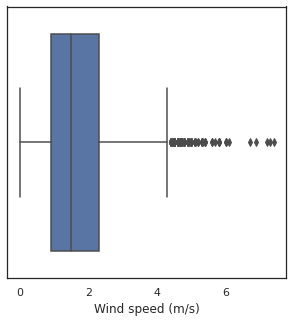

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['Wind speed (m/s)'] )
plt.show()

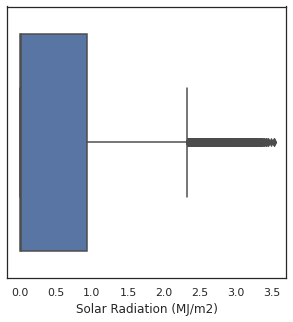

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['Solar Radiation (MJ/m2)'] )
plt.show()

#Removing Outliers

In [ ]:
Q1 ,Q2, Q3 = np.percentile(df['Wind speed (m/s)'],[25,50,75])
IQR = Q3 - Q1

low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
print(low_lim,up_lim)

-1.1999999999999997 4.3999999999999995


In [ ]:
df = df[df['Wind speed (m/s)']<up_lim]
df = df[df['Wind speed (m/s)']>low_lim]

In [ ]:
Q1 , Q3 = np.percentile(df['Solar Radiation (MJ/m2)'],[25,75])
IQR = Q3 - Q1

low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
print(low_lim,up_lim)

-1.35 2.25


In [ ]:

df = df[df['Solar Radiation (MJ/m2)']<up_lim]
df = df[df['Solar Radiation (MJ/m2)']>low_lim]

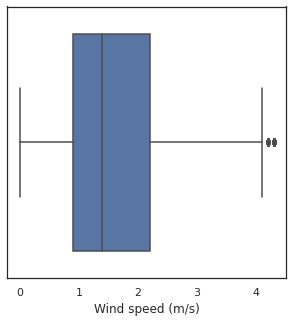

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['Wind speed (m/s)'] )
plt.show()

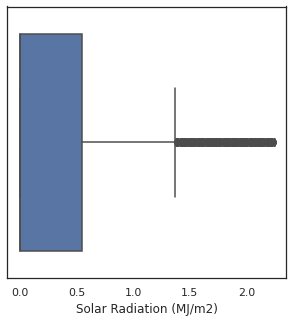

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['Solar Radiation (MJ/m2)'] )
plt.show()

In [ ]:
# col = df.columns
# plt.figure(figsize=(5,5))
# for i in col:
#   plt.subplot(4,4,(int)i[0]+1)
#   sns.boxplot(x = i[1],hue='Rented Bike Count',data= df)

#Plot the correlation between the variables and state your comments

In [ ]:
df_corr=df.corr()
df_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Rented Bike Count,1.000000,0.414797,0.537780,-0.176562,0.135288,0.196567,0.382032,0.246138,-0.120803,-0.137473,-0.243095,0.075650,0.194667
Hour,0.414797,1.000000,0.116513,-0.233066,0.287022,0.093947,0.001622,0.147530,0.010173,-0.017072,0.000628,0.000758,0.003140
Temperature(C),0.537780,0.116513,1.000000,0.243716,-0.065874,0.014340,0.925929,0.251453,0.062625,-0.216687,-0.351972,0.050671,-0.061729
Humidity(%),-0.176562,-0.233066,0.243716,1.000000,-0.301664,-0.546503,0.581140,-0.389728,0.237311,0.100015,-0.143467,0.051126,-0.017137
Wind speed (m/s),0.135288,0.287022,-0.065874,-0.301664,1.000000,0.165041,-0.178699,0.289969,-0.015743,0.005054,0.122844,-0.014212,0.016808
Visibility (10m),0.196567,0.093947,0.014340,-0.546503,0.165041,1.000000,-0.185429,0.116002,-0.166560,-0.120407,-0.009530,-0.035920,-0.031163
Dew point temperature(C),0.382032,0.001622,0.925929,0.581140,-0.178699,-0.185429,1.000000,0.045623,0.131400,-0.150420,-0.343955,0.060285,-0.058928
Solar Radiation (MJ/m2),0.246138,0.147530,0.251453,-0.389728,0.289969,0.116002,0.045623,1.000000,-0.066605,-0.050989,-0.063242,0.011302,-0.019203
Rainfall(mm),-0.120803,0.010173,0.062625,0.237311,-0.015743,-0.166560,0.131400,-0.066605,1.000000,0.006892,-0.019754,0.014295,0.002026
Snowfall (cm),-0.137473,-0.017072,-0.216687,0.100015,0.005054,-0.120407,-0.150420,-0.050989,0.006892,1.000000,0.144399,0.013392,0.033464


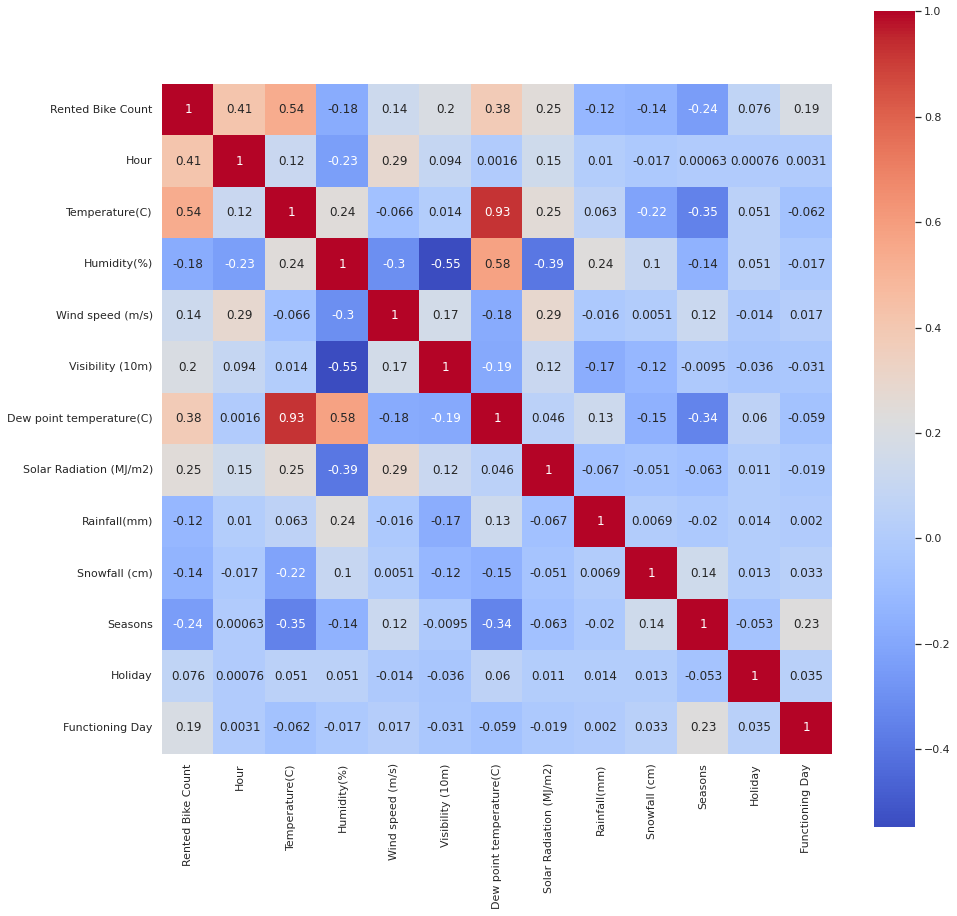

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True,cmap='coolwarm',square= True)
plt.show()

# Spliting DataSet 



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score

In [ ]:
x = df.drop(['Rented Bike Count'],axis = 1)
y = df['Rented Bike Count']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

# Creating & Training our model

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)
prediction = model.predict(x_test)

# Model Score

In [ ]:
print("Model R2 Score Is:",round(r2_score(y_test,prediction)*100))

Model R2 Score Is: 55


In [ ]:
model_score = model.score(x_test,y_test)
print("Model Accuracy is:",round(model_score*100))

Model Accuracy is: 55


# Model score by using Ridge

In [ ]:
from sklearn.linear_model import Ridge
R_model = Ridge()
R_model.fit(x_train,y_train)
Ridge_sc = R_model.score(x_test,y_test)
print("Model Accuracy is:",round(Ridge_sc*100))

Model Accuracy is: 55


# Model Score by using Lasso

In [ ]:
from sklearn.linear_model import Lasso
L_model = Lasso()
L_model.fit(x_train,y_train)
Lasso_sc = L_model.score(x_test,y_test)
print("Model Accuracy is:",round(Lasso_sc*100))

Model Accuracy is: 55
